In [1]:
import os
import torch
import numpy as np
import seaborn as sns
import torch.nn as nn
import matplotlib.pyplot as plt
import pickle

In [2]:
GNDTRUTH = "../data/taccruns/cameo_subset_gndtruth_pdbs/"
#DOE_PTH = "../data/taccruns/predictions-zDOE_no_ipa_during_pert/" #"../data/taccruns/predictions-zDOE/"

In [3]:
# from 6DOE_track_latent_space.ipynb
LATENTSPACE_UNPERTURBED = "../data/taccruns/predictions-latentspacesave1-unperturbed/"#"../data/taccruns/predictions-latentspace-unperturbed/"
DOE_7bcz_A = "../data/taccruns/predictions-latentspacesave-DOEstrucmodu_7bcz_A/" #
DOE_STRUCT_MODU = "../data/taccruns/predictions-latentspacesave-DOE_struct_modu_model1/"#"../data/taccruns/predictions-latentspacesave-DOE_struct_modu_model4/"
GNDTRUTH = "../data/taccruns/cameo_subset_gndtruth_pdbs/"
DOE_perturbable_model1 = "../data/taccruns/predictions-lspace-DOE_model1_perturbable/" # containes proteins tmscore_model1 <0.6 : 
        #7b26_C 7e2v_A 7kdx_B 6xqj_A 7mqy_A 7nf9_A 7rg7_A 7s13_L 7bcb_B 7s02_C 7bcz_A(unperturbable)


In [4]:
def get_proteins_in_pth(pth):
    list_proteins = []
    for file in os.listdir(pth):
        if not file[0:6] in list_proteins: list_proteins.append(file[0:6])
    return list_proteins


In [5]:
# get cameo dict
with open('cameo_dict.pkl', 'rb') as f: cameo_dict = pickle.load(f)
stats = ['tmscore_model1','tmscore_model4','tmscore_model1_1iter',
         'tmscore_model1_struc_modu_s0firstblock_1iter','tmscore_model1_struc_modu_s0firstblock',
         'tmscore_model1_s0_after_struc_modu']

In [6]:
def tmscore(gnd_truth, modified):
    tmscore = -1
    os.system(f"./../tmscore/TMscore -infmt1 -1 -infmt1 -1 {gnd_truth} {modified} >> tmscore_temp_output")
    with open("tmscore_temp_output") as f:
        for line in f:
            if line.startswith("TM-score"):
                tmscore = float(line.split('=')[1].strip().split(' ')[0])
    os.system("rm tmscore_temp_output")
    return tmscore

def get_row(protein,compare_file_pth, DOE_PTH): 
    data = []
    for r_zeroed in range(4):
        for i_zeroed in range(9):
            file = DOE_PTH + f'{protein}_lspace_zeroedat_r_{r_zeroed}_i_{i_zeroed-1}/' + f"{protein}_model_1_ptm_unrelaxed.pdb"
            data.append( tmscore(file,compare_file_pth) )
    return data

def get_grid(protein,DOE_PTH):
    data = []
    ticks = []
    for r_zeroed in range(4):
        for i_zeroed in range(9):
            compare_file_pth = DOE_PTH + f'{protein}_lspace_zeroedat_r_{r_zeroed}_i_{i_zeroed-1}/' + f"{protein}_model_1_ptm_unrelaxed.pdb"
            data.append( get_row(protein,compare_file_pth, DOE_PTH) )
            ticks.append( f"r{r_zeroed} i{i_zeroed-1}" ) # line name on plot
    return data, ticks

def plot_grid(protein, DOE_PTH):
    '''
    list_lines: tensors saved at line 0, 6, and 9. this list contains which lines i wish to include in this plot
    protein: protein of interest
    i/r_zeroed: where the zeroing took place. Note: perturbing z or s is not saved in the file name, but in the dir name.
    '''
    data, ticks = get_grid(protein, DOE_PTH)
    ax = sns.heatmap(data, xticklabels = ticks, yticklabels = ticks, annot=False)
    ax.invert_yaxis()


In [7]:
plt.rcParams["figure.figsize"] = (16,5)

In [8]:
PTH = DOE_perturbable_model1

In [9]:
scatter_ticks = []
for r_zeroed in range(4):
    for i_zeroed in range(9):
        scatter_ticks.append( f"r{r_zeroed} i{i_zeroed-1}" )

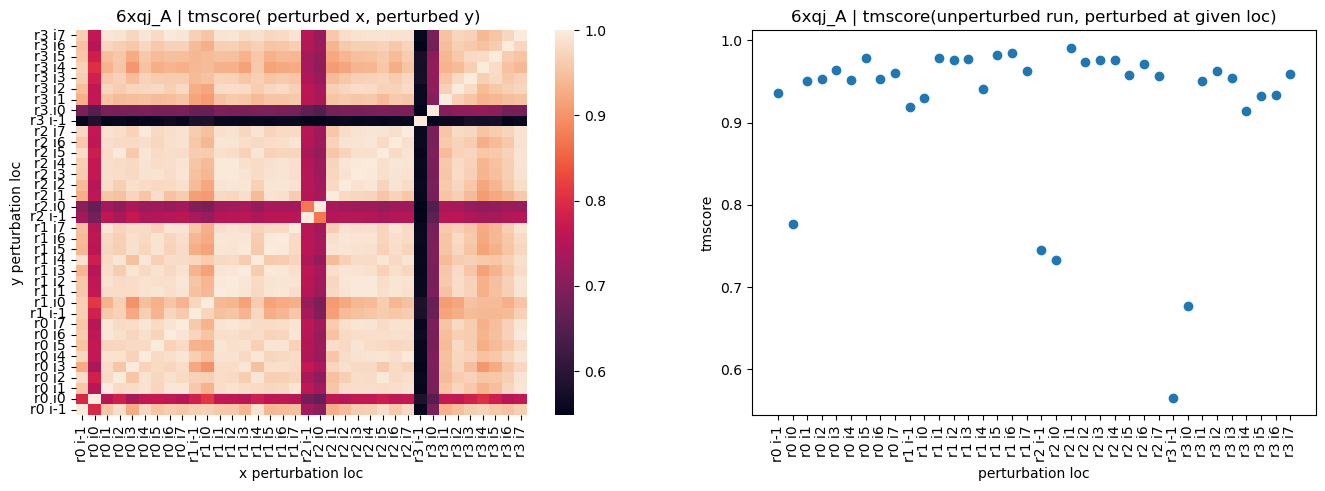

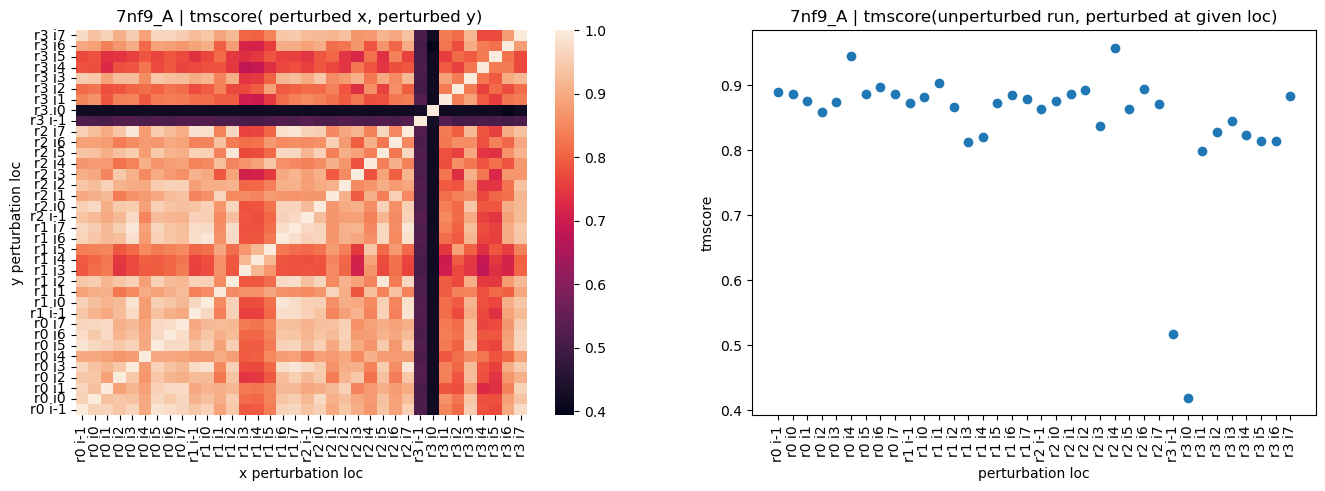

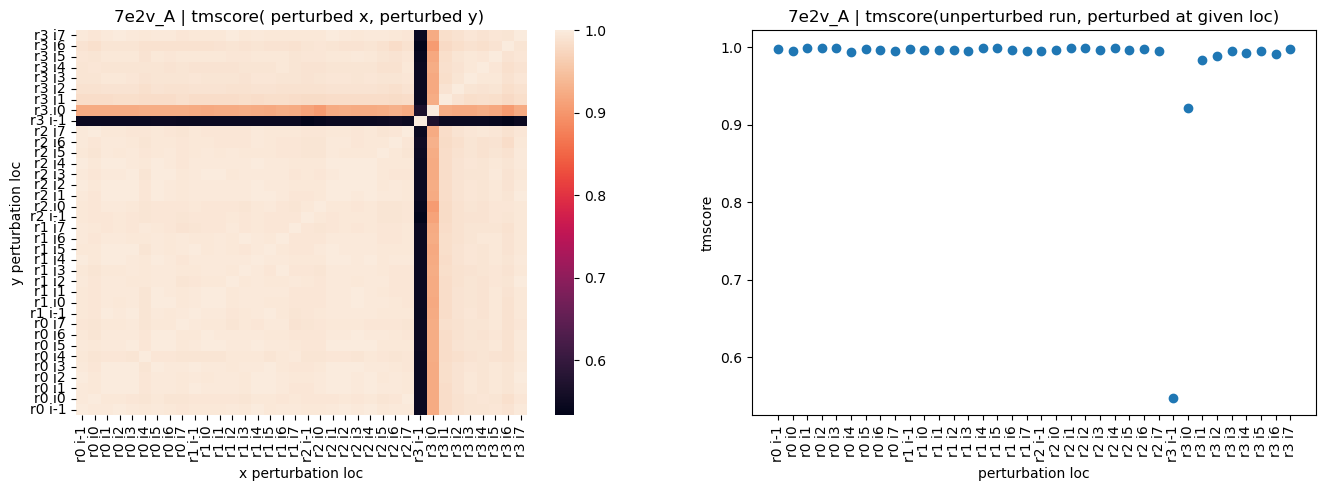

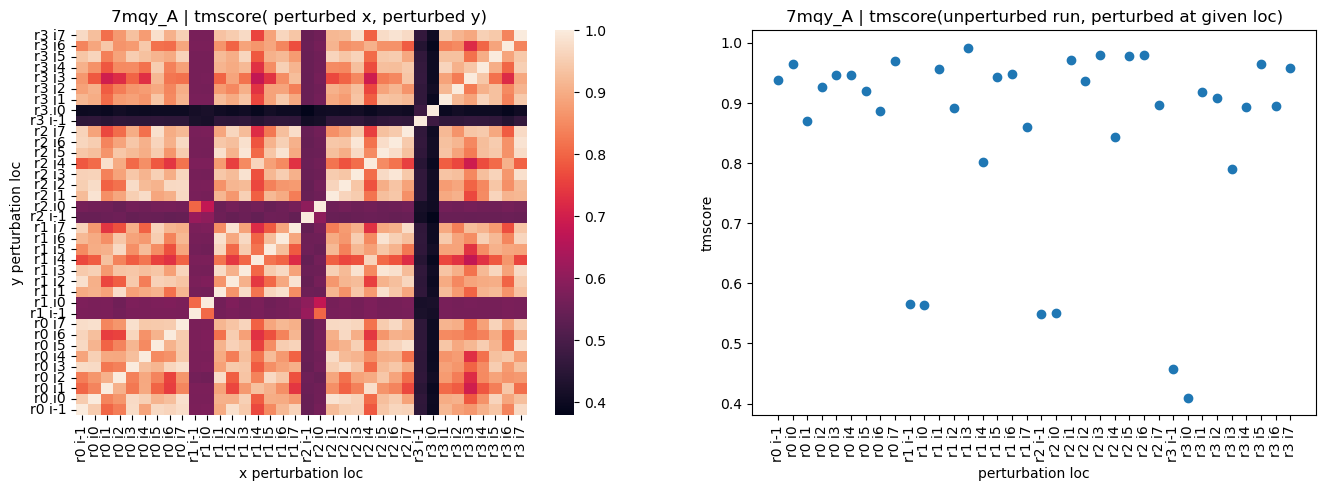

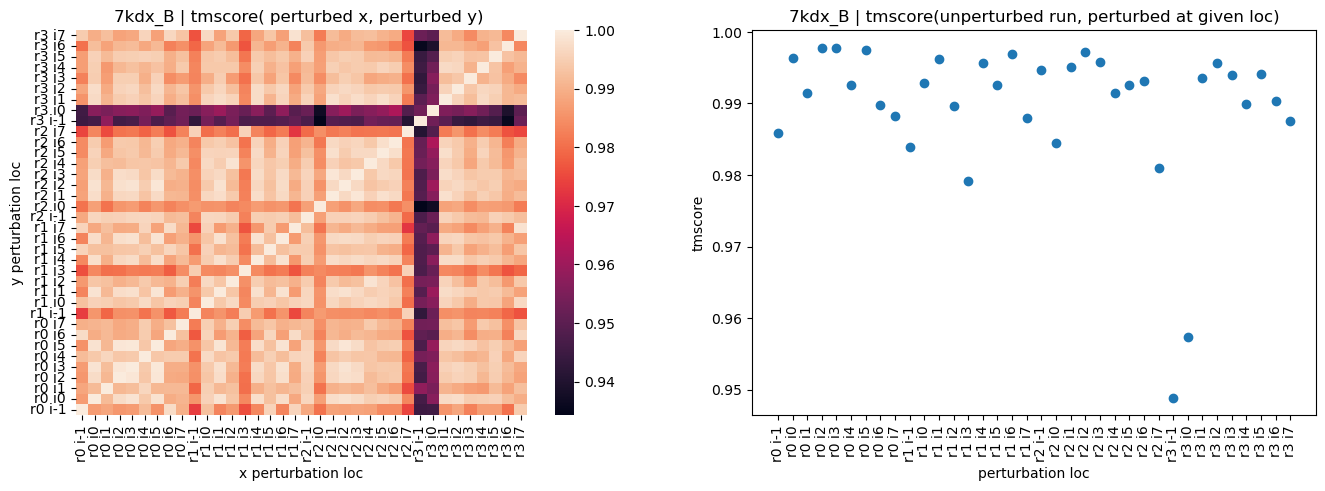

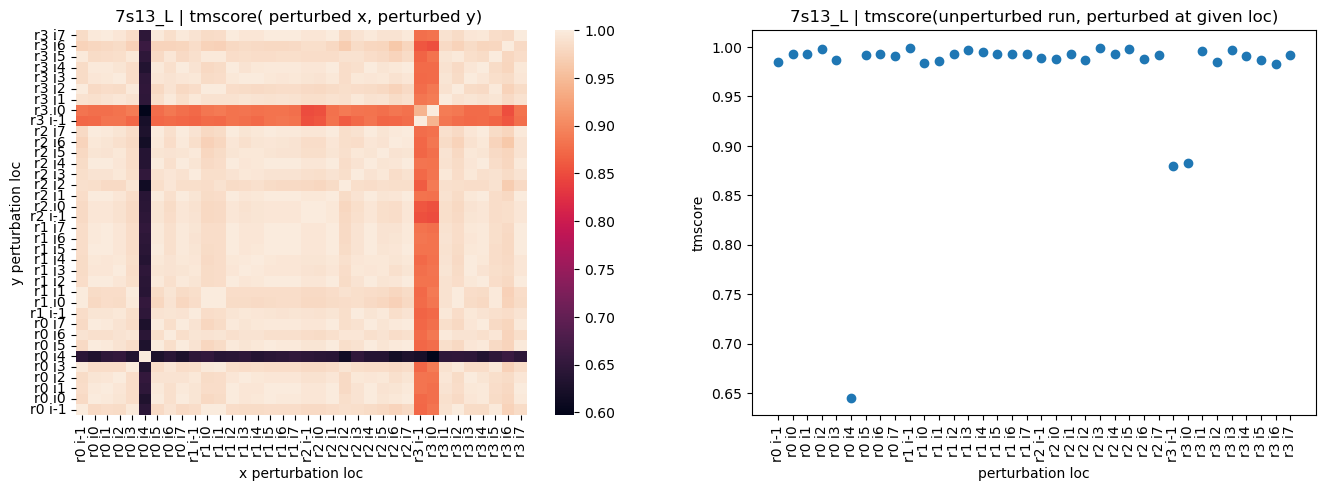

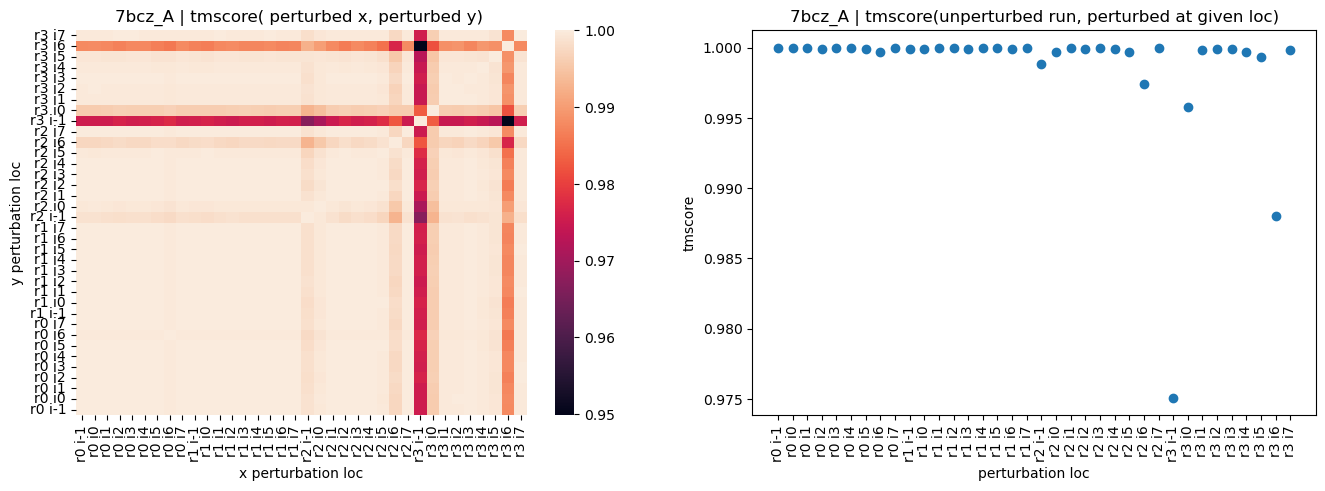

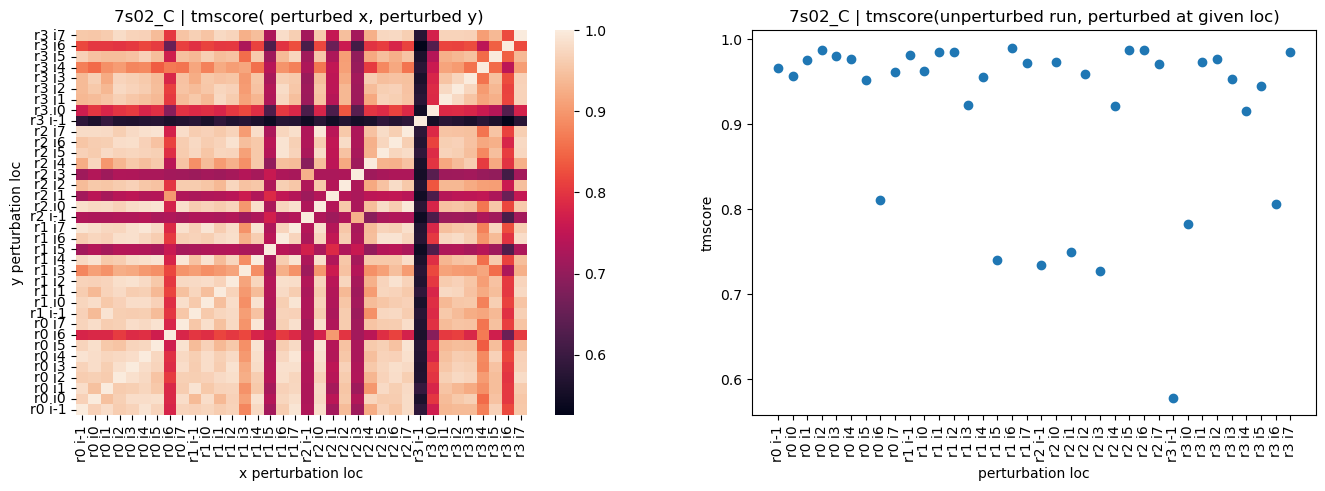

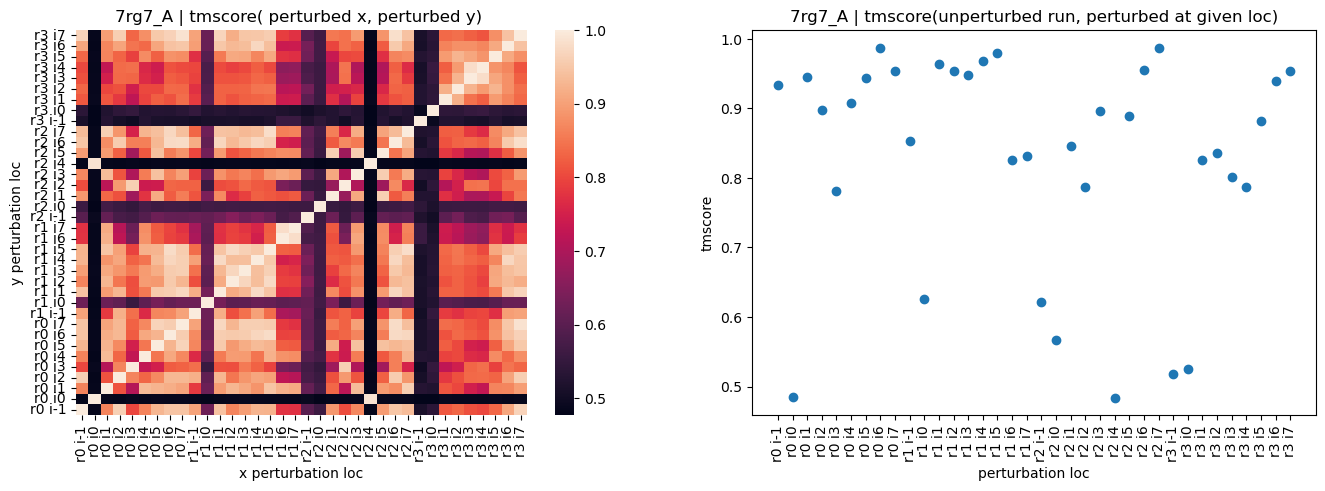

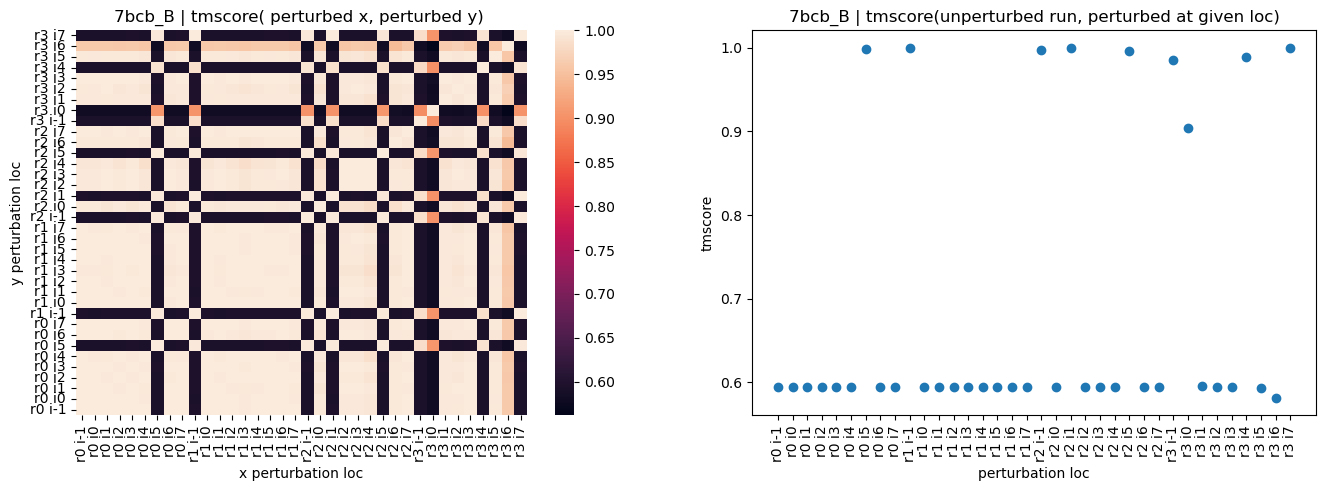

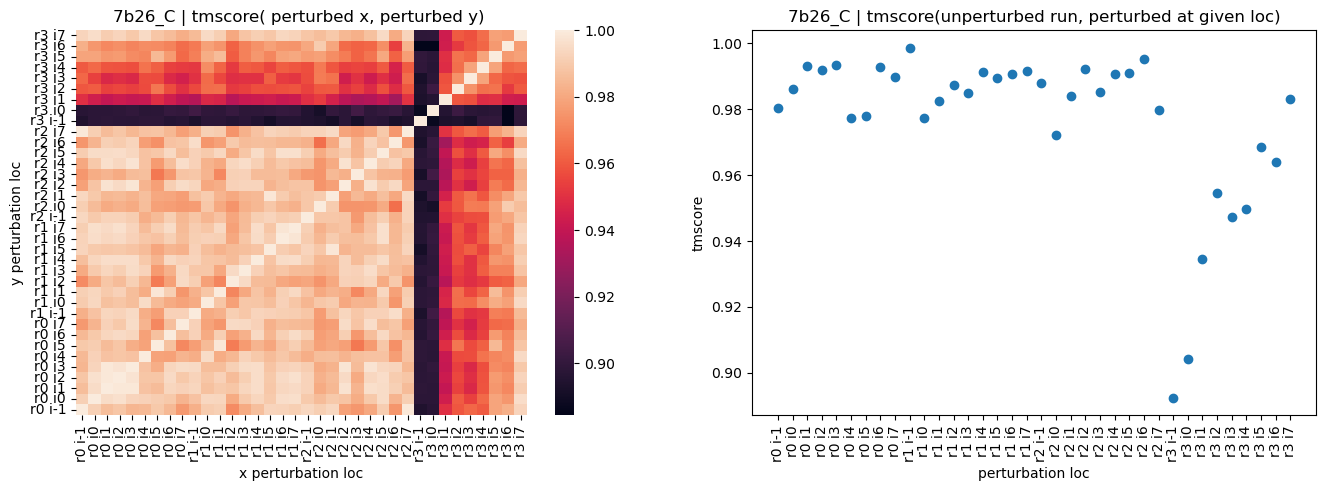

In [10]:

for p in get_proteins_in_pth(PTH):
    plt.subplot(1,2,1)
    plot_grid(p,PTH)
    plt.title(f'{p} | tmscore( perturbed x, perturbed y) ')
    plt.xlabel('x perturbation loc')
    plt.ylabel('y perturbation loc')
    plt.subplot(1,2,2)
    comp = PTH + f'{p}_lspace_zeroedat_r_{-1}_i_{-1}/' + f"{p}_model_1_ptm_unrelaxed.pdb"
    plt.scatter(scatter_ticks,get_row(p,comp,PTH))
    plt.xticks(rotation=90)
    plt.ylabel('tmscore')
    plt.xlabel('perturbation loc')
    plt.title(f'{p} | tmscore(unperturbed run, perturbed at given loc)')
    plt.ylim(0.3,1.0)
    plt.show()
    